#  A Whale off the Port(folio)
### German Santiago Calvo

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../pandas-homework/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True).sort_index()
# Check DateTimeIndex
whale_returns.index

DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11',
               '2015-03-12', '2015-03-13',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1060, freq=None)

In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [5]:
# Check nulls were dropped
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Check order
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("../pandas-homework/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True).sort_index()

In [8]:
# Check DateTimeIndex
algo_returns.index

DatetimeIndex(['2014-05-28', '2014-05-29', '2014-05-30', '2014-06-02',
               '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06',
               '2014-06-09', '2014-06-10',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1241, freq=None)

In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [11]:
# Check nulls were dropped
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices and rename column "Close" to "S&P 500"
sp500_history_csv = Path("../pandas-homework/sp500_history.csv")
sp500_historical_prices = pd.read_csv(sp500_history_csv, parse_dates=True, index_col='Date', infer_datetime_format=True).rename(columns={"Close":"S&P 500"}).sort_index()

In [13]:
# Check Data Types
sp500_historical_prices.dtypes

S&P 500    object
dtype: object

In [14]:
# Fix Data Types, rename columns, remove "$" sign, and sort
sp500_historical_prices["S&P 500"] = sp500_historical_prices["S&P 500"].str.replace("$", "").astype("float")
# Check for changes
sp500_historical_prices.dtypes

S&P 500    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp500_returns = sp500_historical_prices.pct_change()

In [16]:
# count nulls
sp500_returns.isnull().sum()

S&P 500    1
dtype: int64

In [17]:
# drop nulls
sp500_returns.dropna(inplace=True)

In [18]:
# check for nulls
sp500_returns.isnull().sum()

S&P 500    0
dtype: int64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Concatenate all DataFrames into a single DataFrame
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [20]:
# check nulls
combined_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns.

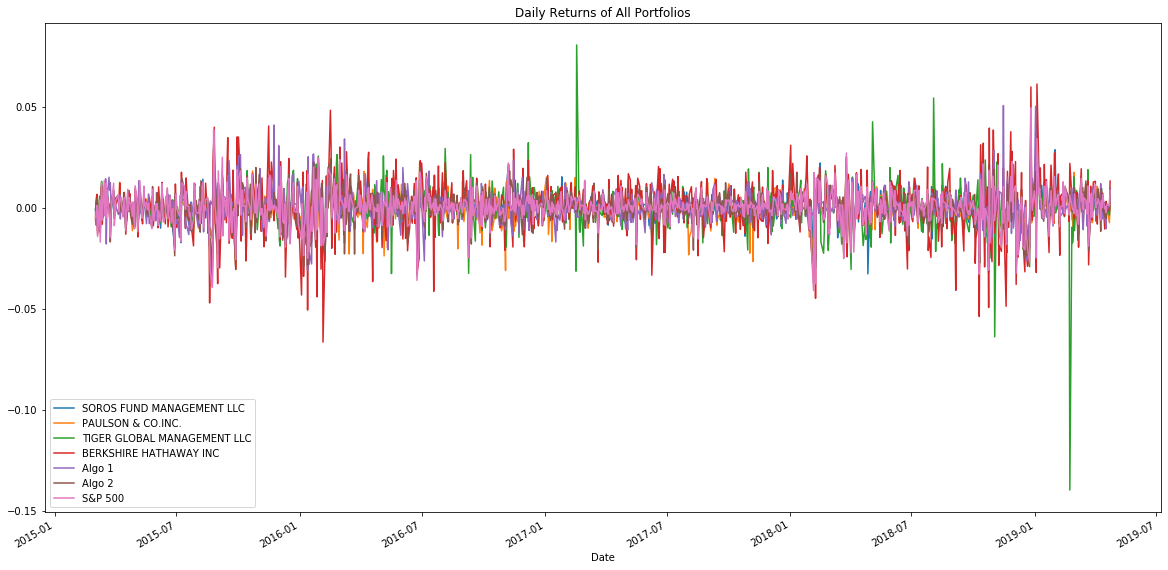

In [21]:
# Plot daily returns
combined_returns.plot(figsize=(20, 10), title="Daily Returns of All Portfolios")

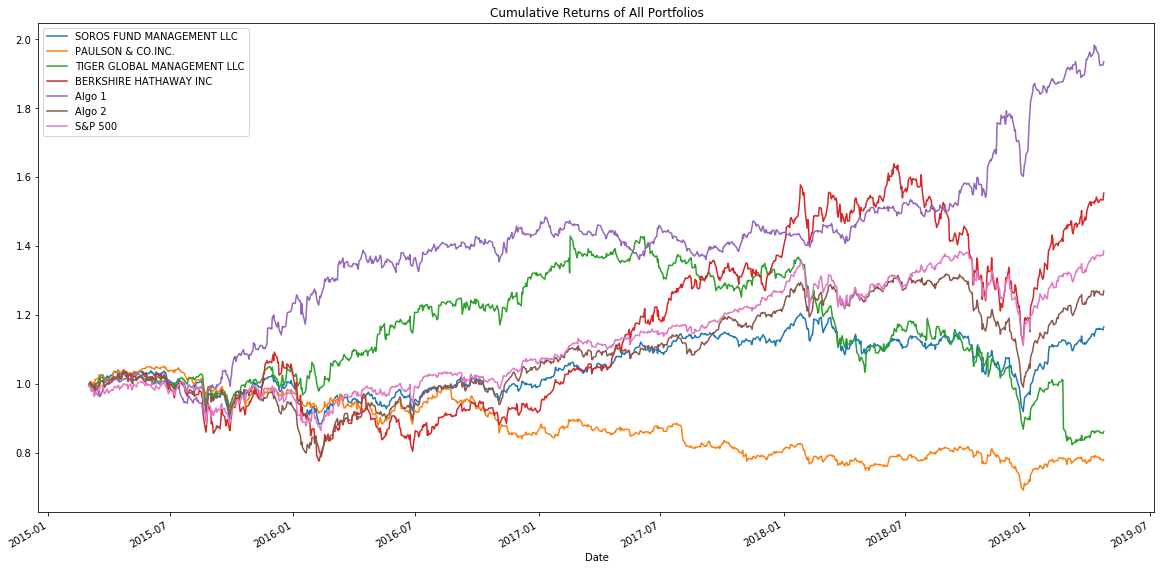

In [22]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of All Portfolios")

### Does any portfolio outperform the S&P 500? 
Berkshire Hathaway, Inc. and the Algo 1 portfolios were the only ones to outperform the market - S&P 500 Index

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

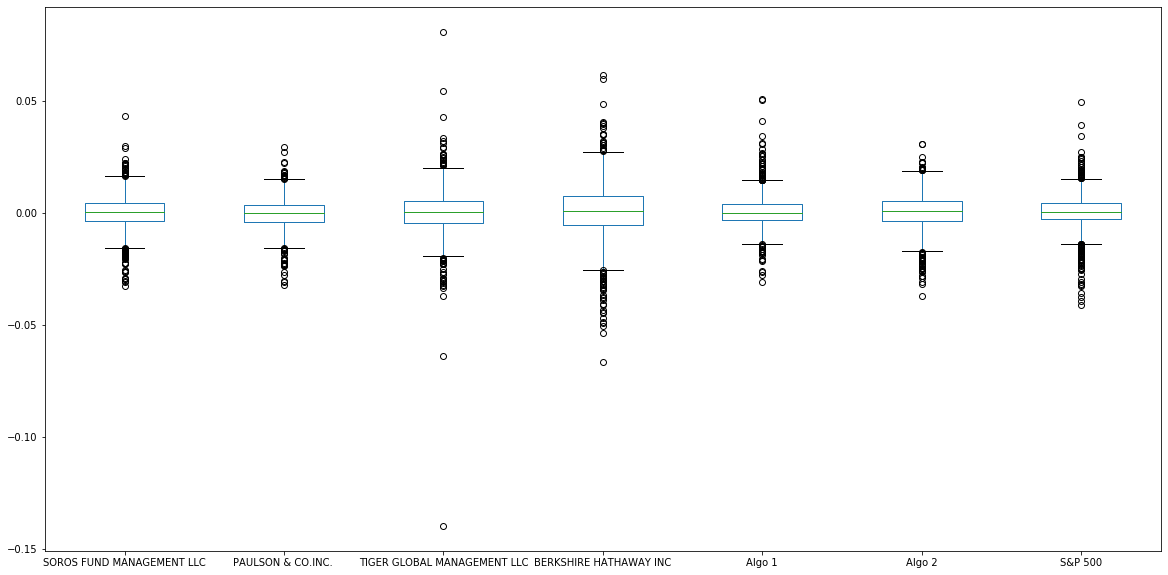

In [23]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10))

Tiger Global has the largest spread.<br> 
Paulson & Co has the smallest spread.

In [24]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
# Which portfolios are riskier than the S&P 500?
daily_std_dev = combined_returns.std()
daily_std_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P 500
daily_std_dev = daily_std_dev.sort_values()
daily_std_dev

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
annualized_std_dev

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

Tiger Global and Berkshire Hathaway are the riskiest portfolios

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

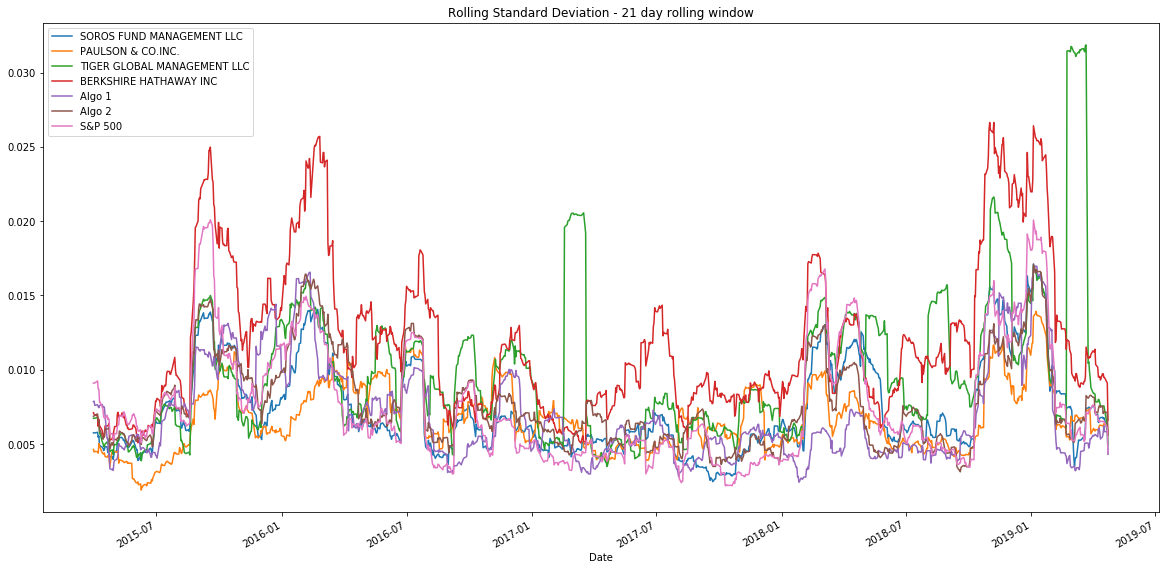

In [27]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation - 21 day rolling window")

2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?

Soros Fund Management LLC & Algo 2 more closely mimic the S&P 500 with correlations of 0.84 and 0.85 respectively

In [28]:
# Construct a correlation table
combined_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

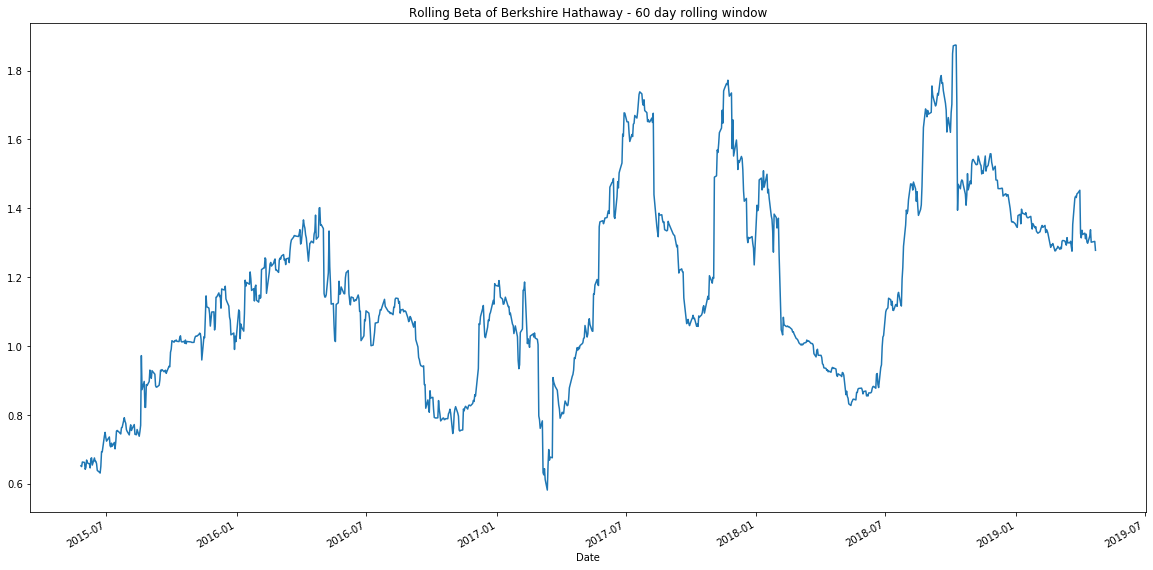

In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
bh_rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['S&P 500'])
sp500_rolling_variance = combined_returns['S&P 500'].rolling(window=60).var()

bh_rolling_beta =  bh_rolling_covariance / sp500_rolling_variance

# (Your graph may differ, dependent upon which portfolio you are comparing)
bh_rolling_beta.plot(figsize=(20,10), title="Rolling Beta of Berkshire Hathaway - 60 day rolling window")

Berkshire Hathaway's fluctuations in the above graph represent sensitivity to the market

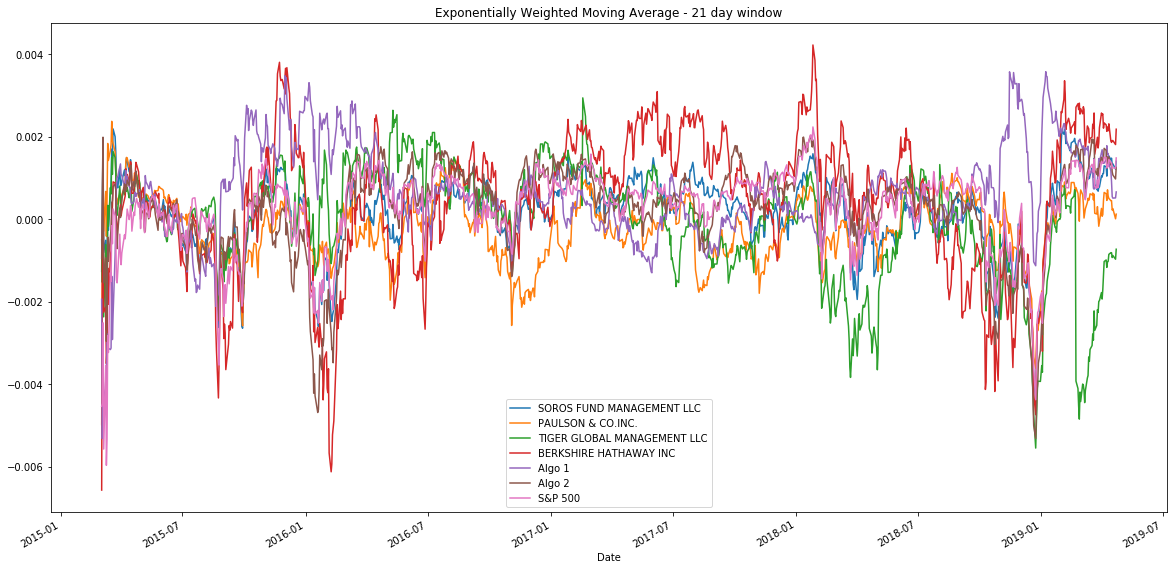

In [30]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_returns.ewm(halflife=21).mean().plot(figsize=(20,10), title="Exponentially Weighted Moving Average - 21 day window")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [31]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252)) 
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

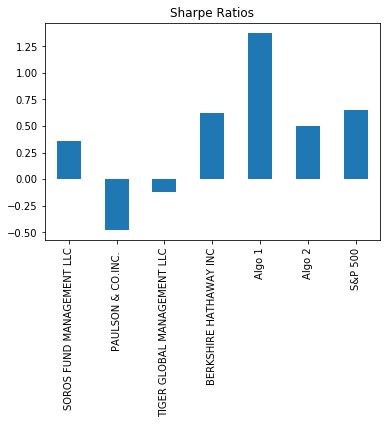

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Only the Algo 1 portfolio outperformed 'the market' and the whales with a Sharpe ratio of 1.38

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Calvo Capital manages a portfolio of 4 stocks -
1. Electronic Arts
2. Chipotle
3. Southwest Airlines
4. Amazon

In [33]:
# Read the first stock
ea_csv = Path("../pandas-homework/ea.csv")
ea_data = pd.read_csv(ea_csv, parse_dates=True, index_col='Date', infer_datetime_format=True).rename(columns={"Close":"EA"}).sort_index()

In [34]:
# Read the second stock
chipotle_csv = Path("../pandas-homework/chipotle.csv")
chipotle_data = pd.read_csv(chipotle_csv, parse_dates=True, index_col='Date', infer_datetime_format=True).rename(columns={"Close":"Chipotle"}).sort_index()

In [35]:
# Read the third stock
southwest_csv = Path("../pandas-homework/southwest.csv")
southwest_data = pd.read_csv(southwest_csv, parse_dates=True, index_col='Date', infer_datetime_format=True).rename(columns={"Close":"Southwest"}).sort_index()

In [36]:
# Read the fourth stock
amazon_csv = Path("../pandas-homework/amazon.csv")
amazon_data = pd.read_csv(amazon_csv, parse_dates=True, index_col='Date', infer_datetime_format=True).rename(columns={"Close":"Amazon"}).sort_index()

In [37]:
# Concatenate all stocks into a single DataFrame
calvocapital_prices = pd.concat([ea_data, chipotle_data, southwest_data, amazon_data], axis="columns", join="inner").sort_index()

In [38]:
# Calculate the returns of the portfolio
calvocapital_returns = calvocapital_prices.pct_change()

calvocapital_returns

,EA,Chipotle,Southwest,Amazon
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.013577,-0.003622,-0.005880,-0.002723
2015-03-04,0.009352,-0.006388,0.001137,-0.004914
2015-03-05,0.003147,0.009531,0.002045,0.013352
2015-03-06,-0.017776,-0.017614,-0.018141,-0.019957
...,...,...,...,...
2019-04-16,-0.041083,-0.008129,0.009371,0.009849
2019-04-17,-0.020036,-0.025861,-0.000379,0.000955
2019-04-18,0.012942,0.017131,-0.010993,-0.001678


In [39]:
# Check nulls
calvocapital_returns.isnull().sum()

EA           1
Chipotle     1
Southwest    1
Amazon       1
dtype: int64

In [40]:
# Drop Nulls
calvocapital_returns.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Calculate weighted portfolio returns
weights = [0.25, 0.25, 0.25, 0.25]
calvocapitalportfolio_returns = calvocapital_returns.dot(weights)

calvocapitalportfolio_returns.head()

Date
2015-03-03   -0.006450
2015-03-04   -0.000203
2015-03-05    0.007019
2015-03-06   -0.018372
2015-03-09    0.001576
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_returns["Calvo Capital"] = calvocapitalportfolio_returns

In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Calvo Capital                  0
dtype: int64

### Annualized Standard Deviations and Plot of Rolling Standard Deviation with a 21-Day Rolling Window

In [44]:
# Risk
annualized_std_dev = combined_returns.std() * np.sqrt(252)

annualized_std_dev.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
Calvo Capital                  0.203612
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

Tiger Global, Calvo Capital, and Berkshire Hathaway are riskier than the market

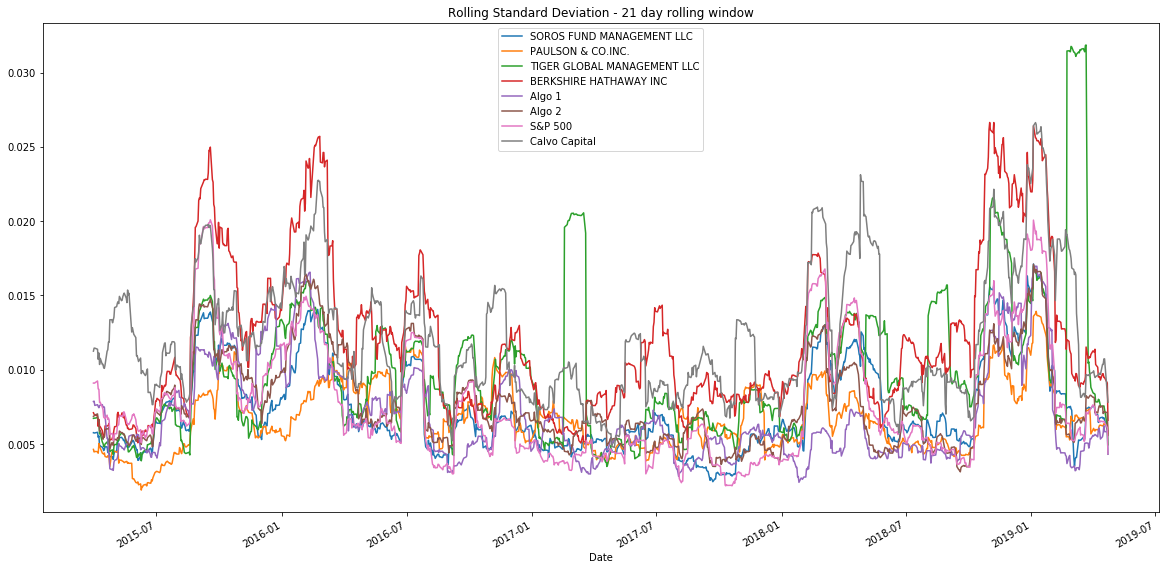

In [45]:
# Rolling
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation - 21 day rolling window")

### Sharpe Ratios with Bar Plot

In [46]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252)) 

sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Calvo Capital                  0.930393
Algo 1                         1.378648
dtype: float64

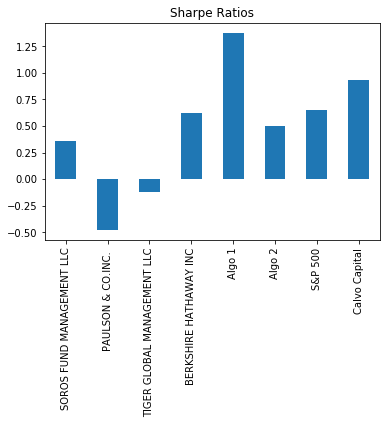

In [47]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Correlation Table

In [48]:
combined_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Calvo Capital
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.605286
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.470342
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.418778
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.600374
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.225088
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.591457
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.678025
Calvo Capital,0.605286,0.470342,0.418778,0.600374,0.225088,0.591457,0.678025,1.000000


### Rolling Beta of Calvo Capital Portfolio using a 60-day Window

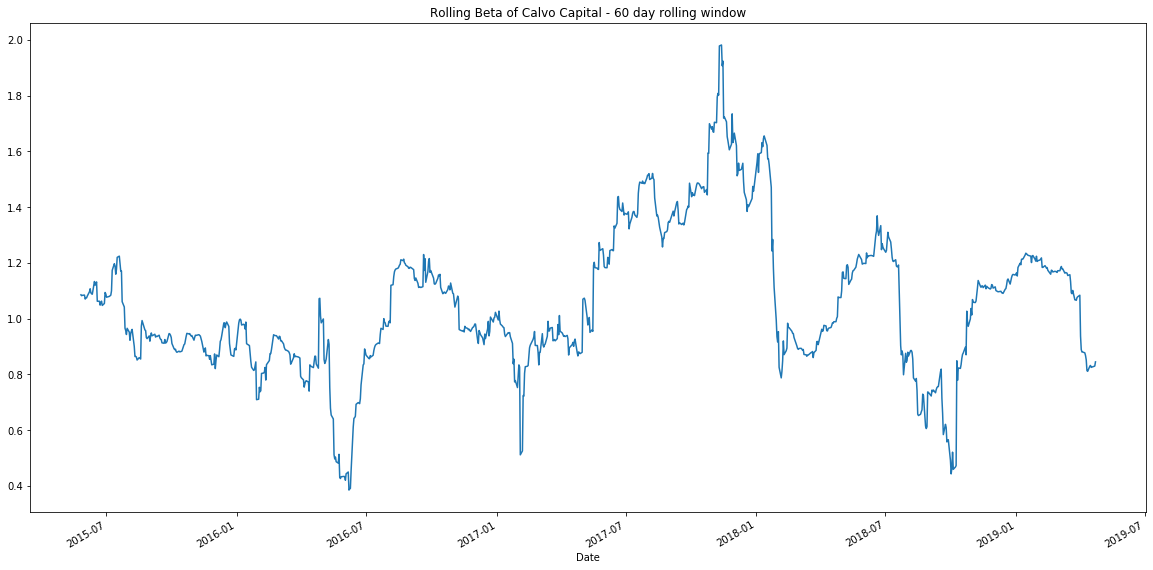

In [49]:
# Beta
calvo_rolling_cov = combined_returns['Calvo Capital'].rolling(window=60).cov(combined_returns['S&P 500'])

calvo_rolling_beta =  calvo_rolling_cov / sp500_rolling_variance

calvo_rolling_beta.plot(figsize=(20,10), title="Rolling Beta of Calvo Capital - 60 day rolling window")

The Calvo Portfolio is mostly more volatile than the market with short periods of very little to no volatility